<a href="https://colab.research.google.com/github/aarshparashar/CodeCrops/blob/main/crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Dependencies

In [1]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('yield_df.csv')

In [ ]:
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [ ]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)

    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()

    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())

    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())

get_df_info(df)



Shape of DataFrame:  (28242, 8)

Columns in DataFrame:  ['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

Data types of columns:
 Unnamed: 0                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year         

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head(10)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


# **Data Visualisation**

> **Areawise Yield of Item over the years**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

area_dropdown = widgets.Dropdown(options=df['Area'].unique(), description='Area:')
item_dropdown = widgets.Dropdown(options=df['Item'].unique(), description='Item:')

def plot_data(area, item):
    plt.figure(figsize=(10,6))
    temp_df = df[(df['Area'] == area) & (df['Item'] == item)]
    plt.plot(temp_df['Year'], temp_df['hg/ha_yield'])
    plt.title(f'hg/ha_yield over the years for {item} in {area}')
    plt.xlabel('Year')
    plt.ylabel('hg/ha_yield')
    plt.grid(True)
    plt.show()

widgets.interactive(plot_data, area=area_dropdown, item=item_dropdown)


interactive(children=(Dropdown(description='Area:', options=('Albania', 'Algeria', 'Angola', 'Argentina', 'Arm…

**The code above will create two dropdown widgets: one for selecting a crop and another for selecting an area. The options in each dropdown will be updated based on the selected value in the other dropdown. When you select a crop and an area from the dropdowns, it will display a line plot of yield for different years for the selected crop in the selected area.**

> **Area wise usage of pesticides over the years**

In [ ]:
area_dropdown = widgets.Dropdown(options=df['Area'].unique(), description='Area:')

def plot_data(area):
    plt.figure(figsize=(10,6))
    temp_df = df[df['Area'] == area]
    plt.plot(temp_df['Year'], temp_df['pesticides_tonnes'])
    plt.title(f'Pesticides Tonnes over the years in {area}')
    plt.xlabel('Year')
    plt.ylabel('Pesticides Tonnes')
    plt.grid(True)
    plt.show()

widgets.interactive(plot_data, area=area_dropdown)


interactive(children=(Dropdown(description='Area:', options=('Albania', 'Algeria', 'Angola', 'Argentina', 'Arm…

**The code above will create a dropdown widget for selecting an area. When you select an area from the dropdown, it will display a line plot of pesticides_tonnes for different years for the selected area.**

> **Correlation Matrix**

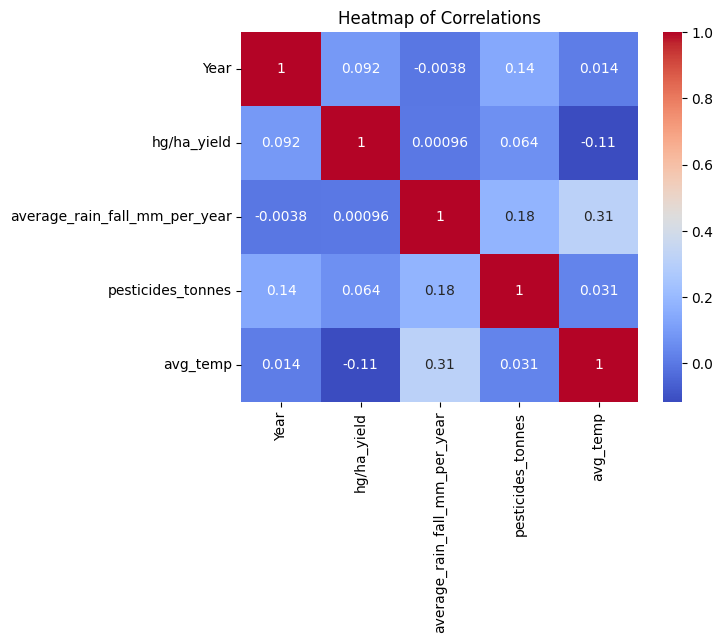

In [ ]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

# **Data Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR


**Next, let’s separate the features and the target variable:**

In [ ]:
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

In [ ]:
X

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.00,16.37
1,Albania,Potatoes,1990,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,1485.0,121.00,16.37
3,Albania,Sorghum,1990,1485.0,121.00,16.37
4,Albania,Soybeans,1990,1485.0,121.00,16.37
...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,657.0,2550.07,19.76


In [ ]:
y.head()

0    36613
1    66667
2    23333
3    12500
4     7000
Name: hg/ha_yield, dtype: int64

**Now, let’s handle the categorical features using OneHot Encoding:**

In [ ]:
categorical_features = ['Area', 'Item']
numerical_features = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])


**Next, let’s split the data into training and testing sets:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# **Machine Learning**

**Now, let’s define the models:**

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=101)),
    ('Random Forest', RandomForestRegressor(random_state=101)),
    ('Extra Trees', ExtraTreesRegressor(random_state=101)),
    ('Support Vector Machine', SVR())
]


**Finally, let’s train each model, make predictions, and evaluate the results:**

In [ ]:
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}\n')


Linear Regression:
Mean Squared Error: 1750358842.1886008
Mean Absolute Error: 29124.4374930374
R^2 Score: 0.7509559569566198

Decision Tree:
Mean Squared Error: 125388999.87519915
Mean Absolute Error: 3484.5751460435476
R^2 Score: 0.9821594391221862

Random Forest:
Mean Squared Error: 84238917.77053303
Mean Absolute Error: 3428.922715524872
R^2 Score: 0.9880143430264045

Extra Trees:
Mean Squared Error: 64353670.59966091
Mean Absolute Error: 2584.094949548593
R^2 Score: 0.9908436499279303

Support Vector Machine:
Mean Squared Error: 8400823561.58569
Mean Absolute Error: 55849.77949324983
R^2 Score: -0.1952835122970502



Looking at our results:

**Linear Regression:** The MSE and MAE are quite high, which indicates that the model’s predictions are not very accurate. The R^2 score is 0.75, which means the model explains 75% of the variance in the target variable.

**Decision Tree:** The MSE and MAE are much lower than that of Linear Regression, indicating better performance. The R^2 score is very high (0.98), meaning the model explains 98% of the variance in the target variable.

**Random Forest:** This model performs even better than the Decision Tree, with a lower MSE and MAE, and a higher R^2 score.

**Extra Trees:** This model performs the best among all models, with the lowest MSE and MAE, and the highest R^2 score.

**Support Vector Machine:** This model performs the worst among all models, with a very high MSE and MAE, and a negative R^2 score. This indicates that the model’s predictions are not accurate and it does not explain the variance in the target variable well.

**Next, we can apply a GridSearchCV on Extra Trees model to check if we can improve on the scores.**

**THANK YOU**

**Hope you liked the code. Kindly UPVOTE if you find this notebook usefull**